In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# That'd be true flux
flux = np.array([100,150,200,150,100])

In [3]:
# Making up a matrix
import itertools

dkt = {0:10, 1:1, -1:2}

cov = np.zeros((len(flux),len(flux)))
for i,j in itertools.product(*([range(len(flux))]*2)):
    cov[i,j] = dkt.get(i-j,0)
        
cov /= cov.sum(axis=0)
cov

array([[ 0.90909091,  0.15384615,  0.        ,  0.        ,  0.        ],
       [ 0.09090909,  0.76923077,  0.15384615,  0.        ,  0.        ],
       [ 0.        ,  0.07692308,  0.76923077,  0.15384615,  0.        ],
       [ 0.        ,  0.        ,  0.07692308,  0.76923077,  0.16666667],
       [ 0.        ,  0.        ,  0.        ,  0.07692308,  0.83333333]])

In [4]:
cov.dot(flux)

array([ 113.98601399,  155.24475524,  188.46153846,  147.43589744,
         94.87179487])

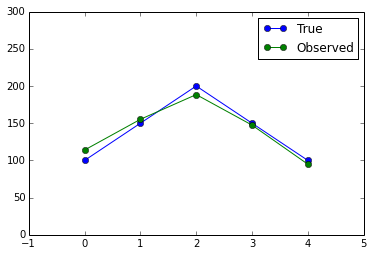

In [5]:
plot(range(len(flux)),flux, 'o-', label="True")
plot(range(len(flux)),cov.dot(flux), 'o-', label="Observed")
xlim(-1,5); ylim(0,300);legend()

In [6]:
import MCMC

In [7]:
mcmc = MCMC.MCMC("testtest", flux[:], flux[:])

In [8]:
alpha = 0.1
observed = cov.dot(flux)

def logp(value):
    value = np.array(value)
    if (value < 0).any(): return -np.inf
    
    expected = cov.dot(value)
    log = (observed*np.log(expected) - expected).sum()

    firstDerivative = np.diff(np.log(value))
    secondDerivative = np.fabs(np.diff(firstDerivative))
    smoothness = -(alpha * secondDerivative).sum()

    return log + smoothness


mcmc.setLogLikelihoodFunction(logp)
mcmc.setSteps(10000)

In [9]:
mcmc.start()
mcmc.join()

save metadata
0/10000 : 0%
step number9364
saving chunk...
df done
file opened
file closed
chunk saved


In [10]:
import pandas as pd
import cPickle as pickle

In [11]:
f = open("testtest", "rb")
print pickle.load(f)
frame = pickle.load(f)
f.close()

{'nVar': 5, 'initialPoints': array([100, 150, 200, 150, 100]), 'realValues': array([100, 150, 200, 150, 100]), 'nStep': 10000, 'sigmas': [1, 1, 1, 1, 1]}


(0, 150)

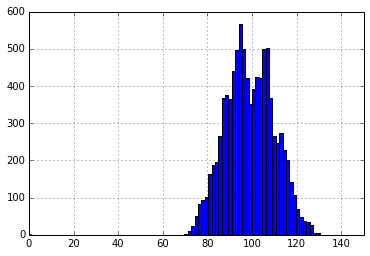

In [16]:
frame[0].hist(bins=np.linspace(0,150,100))
xlim(0,150)